<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [15]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')



8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [4]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# You should only run this cell once your model has been properly configured

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
Instructions for updating:
Use tf.cast instead.
8970/8982 [============================>.] - ETA: 0s - loss: -113.7520 - acc: 0.0497

InvalidArgumentError: indices[9,116] = 30979 is not in [0, 30979)
	 [[{{node embedding/embedding_lookup}}]]

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Please add your answer in markdown here.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Please add your answer in markdown here.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Please add your answer in markdown here.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [17]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 6.8MB/s ta 0:00:01
  Stored in directory: /Users/scholar/Library/Caches/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [18]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 10, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://vetstreet-brightspot.s3.amazonaws.com/8d/ac/377fecad46d8820697c26efacc32/koi-pond-thinkstock-153560141-335sm61313.jpg
Completed Image ====> 3.koi-pond-thinkstock-153560141-335sm61313.jpg
Image URL: https://cdn4.vectorstock.com/i/1000x1000/93/83/many-animals-living-by-the-pond-vector-11159383.jpg
Completed Image ====> 4.many-animals-living-by-the-pond-vector-11159383.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [23]:
absolute_image_paths

({'animal pond': ['/Users/scholar/Lambda/sprint_challenges/downloads/animal pond/1.Pondanimals.GIF',
   '/Users/scholar/Lambda/sprint_challenges/downloads/animal pond/2.hqdefault.jpg',
   '/Users/scholar/Lambda/sprint_challenges/downloads/animal pond/3.koi-pond-thinkstock-153560141-335sm61313.jpg',
   '/Users/scholar/Lambda/sprint_challenges/downloads/animal pond/4.many-animals-living-by-the-pond-vector-11159383.jpg']},
 0)

In [59]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction
    
    Returns: 
    ---------
    frogs (int):  Count of predicted frogs in the image
    """
#     x = image.img_to_array(process_img_path(img))
#     x = np.expand_dims(x,axis=0)
#     x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(img)
    results = decode_predictions(features, top=3)[0]
    print(results)
    frogs = 0
    for entry in results:
        if entry[1] == 'bullfrog':
            frogs +=1
        if entry[1] == 'tree frog': 
            frogs +=1
        if entry[1] == 'tailed frog':
            frogs += 1
        if frogs >= 1:
            return frogs
        else:
            return "No frog :("

In [32]:
test_img = absolute_image_paths[0]['animal pond'][0]

In [53]:
img_contains_frog(absolute_image_paths[0]['animal pond'][3])

[('n03710721', 'maillot', 0.2297734), ('n02837789', 'bikini', 0.22647703), ('n04251144', 'snorkel', 0.07592704)]


'no frogs'

In [57]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

[('n03598930', 'jigsaw_puzzle', 0.8680318), ('n06359193', 'web_site', 0.06409997), ('n02834397', 'bib', 0.021264235)]
[('n01443537', 'goldfish', 0.8495873), ('n01631663', 'eft', 0.06760184), ('n02536864', 'coho', 0.035163406)]
[('n01443537', 'goldfish', 0.9881542), ('n09256479', 'coral_reef', 0.0066813533), ('n12985857', 'coral_fungus', 0.0026060785)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n03710721', 'maillot', 0.2297734), ('n02837789', 'bikini', 0.22647703), ('n04251144', 'snorkel', 0.07592704)]


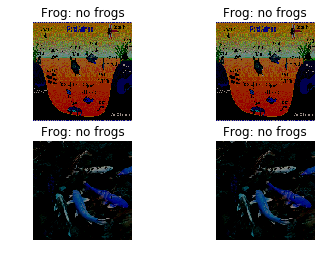

In [58]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [19]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")